# Setting

## Import and Path
* dirname : './data'
* filename : '202*-*.csv'


In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

files = []
for dirname, _, filenames in os.walk('/kaggle/input'):  # './data'
    for filename in filenames:
        print(os.path.join(dirname, filename))
        files.append(filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solar-beehive/2022-09.csv
/kaggle/input/solar-beehive/2022-11.csv
/kaggle/input/solar-beehive/2023-06.csv
/kaggle/input/solar-beehive/2023-01.csv
/kaggle/input/solar-beehive/2023-11.csv
/kaggle/input/solar-beehive/2022-12.csv
/kaggle/input/solar-beehive/2023-03.csv
/kaggle/input/solar-beehive/2022-08.csv
/kaggle/input/solar-beehive/2023-04.csv
/kaggle/input/solar-beehive/2023-07.csv
/kaggle/input/solar-beehive/2023-02.csv
/kaggle/input/solar-beehive/2022-07.csv
/kaggle/input/solar-beehive/2022-10.csv
/kaggle/input/solar-beehive/2023-12.csv
/kaggle/input/solar-beehive/2023-09.csv
/kaggle/input/solar-beehive/2023-05.csv
/kaggle/input/solar-beehive/2023-08.csv
/kaggle/input/solar-beehive/2023-10.csv


In [2]:
dirname

'/kaggle/input/solar-beehive'

In [3]:
files

['2022-09.csv',
 '2022-11.csv',
 '2023-06.csv',
 '2023-01.csv',
 '2023-11.csv',
 '2022-12.csv',
 '2023-03.csv',
 '2022-08.csv',
 '2023-04.csv',
 '2023-07.csv',
 '2023-02.csv',
 '2022-07.csv',
 '2022-10.csv',
 '2023-12.csv',
 '2023-09.csv',
 '2023-05.csv',
 '2023-08.csv',
 '2023-10.csv']

## Make DataFrames
* 월별로 데이터프레임 생성

In [4]:
# make df by date name
df_2022_07 = pd.read_csv(os.path.join(dirname, '2022-07.csv'))
df_2022_08 = pd.read_csv(os.path.join(dirname, '2022-08.csv'))
df_2022_09 = pd.read_csv(os.path.join(dirname, '2022-09.csv'))
df_2022_10 = pd.read_csv(os.path.join(dirname, '2022-10.csv'))
df_2022_11 = pd.read_csv(os.path.join(dirname, '2022-11.csv'))
df_2022_12 = pd.read_csv(os.path.join(dirname, '2022-12.csv'))
df_2023_01 = pd.read_csv(os.path.join(dirname, '2023-01.csv'))
df_2023_02 = pd.read_csv(os.path.join(dirname, '2023-02.csv'))
df_2023_03 = pd.read_csv(os.path.join(dirname, '2023-03.csv'))
df_2023_04 = pd.read_csv(os.path.join(dirname, '2023-04.csv'))
df_2023_05 = pd.read_csv(os.path.join(dirname, '2023-05.csv'))
df_2023_06 = pd.read_csv(os.path.join(dirname, '2023-06.csv'))

df_2022_07

,hiveid,recordday,temp,humidity,co2,weight,incount,outcount,pm10,pm25,extemphigh,extemplow
0,1,1,35.39,82.62,805.58,25100,67373,139549,14,5,33.2,24.2
1,1,2,35.32,82.49,760.57,25550,72354,136499,26,17,34.1,23.4
2,1,3,35.32,82.74,850.46,24800,76658,136779,27,18,33.5,24.5
3,1,4,35.20,83.06,777.32,24850,70647,135589,23,13,32.1,24.0
4,1,5,35.18,84.23,899.56,25250,77334,141126,34,23,30.7,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...
119,4,27,32.59,27.55,863.58,21200,1912,49074,25,17,33.2,24.1
120,4,28,34.98,47.00,446.35,19850,8293,146664,26,17,34.8,22.7
121,4,29,35.43,51.17,544.96,20750,1849,133450,21,14,35.6,25.9
122,4,30,35.47,70.41,540.66,20750,1343,116716,15,9,32.9,24.7


## Split Data
* 'hiveid'==1만 활용
* 벌통 number 2, 3, 4까지 존재
* 추가 데이터셋으로 활용 가능 
* 현재 train code는 1만 활용

In [5]:
# split by hiveid == 1
df_2022_07 = df_2022_07[df_2022_07['hiveid'] == 1]
df_2022_08 = df_2022_08[df_2022_08['hiveid'] == 1]
df_2022_09 = df_2022_09[df_2022_09['hiveid'] == 1]
df_2022_10 = df_2022_10[df_2022_10['hiveid'] == 1]
df_2022_11 = df_2022_11[df_2022_11['hiveid'] == 1]
df_2022_12 = df_2022_12[df_2022_12['hiveid'] == 1]
df_2023_01 = df_2023_01[df_2023_01['hiveid'] == 1]
df_2023_02 = df_2023_02[df_2023_02['hiveid'] == 1]
df_2023_03 = df_2023_03[df_2023_03['hiveid'] == 1]
df_2023_04 = df_2023_04[df_2023_04['hiveid'] == 1]
df_2023_05 = df_2023_05[df_2023_05['hiveid'] == 1]
df_2023_06 = df_2023_06[df_2023_06['hiveid'] == 1]

df_2022_07.tail()

,hiveid,recordday,temp,humidity,co2,weight,incount,outcount,pm10,pm25,extemphigh,extemplow
26,1,27,34.72,78.55,646.40,25900,20619,80857,25,17,33.2,24.1
27,1,28,34.54,78.09,715.64,25600,22007,73744,26,17,34.8,22.7
28,1,29,35.26,78.70,520.84,25650,15640,74974,21,14,35.6,25.9
29,1,30,34.87,77.47,552.45,25000,15727,65773,15,9,32.9,24.7
30,1,31,34.52,77.11,1000.68,23850,11850,43010,10,5,29.0,24.7


## Preprocessing
* ['temp', 'outcount'] 컬럼 라벨링 [-2:]
* 인덱스를 time_steps로 하여 2 stack 데이터로 활용

In [6]:
# labeling last 2 column : ['temp', 'outcount'] 
def preprocessing(df):
    df_front = df[[c for c in df.columns if c not in ['temp', 'outcount']]]
    df_back = df[['temp', 'outcount']]
    df = pd.concat([df_front, df_back], axis=1)
    return df

df_2022_07 = preprocessing(df_2022_07)
df_2022_08 = preprocessing(df_2022_08)
df_2022_09 = preprocessing(df_2022_09)
df_2022_10 = preprocessing(df_2022_10)
df_2022_11 = preprocessing(df_2022_11)
df_2022_12 = preprocessing(df_2022_12)
df_2023_01 = preprocessing(df_2023_01)
df_2023_02 = preprocessing(df_2023_02)
df_2023_03 = preprocessing(df_2023_03)
df_2023_04 = preprocessing(df_2023_04)
df_2023_05 = preprocessing(df_2023_05)
df_2023_06 = preprocessing(df_2023_06)

df_2022_07.tail()

,hiveid,recordday,humidity,co2,weight,incount,pm10,pm25,extemphigh,extemplow,temp,outcount
26,1,27,78.55,646.40,25900,20619,25,17,33.2,24.1,34.72,80857
27,1,28,78.09,715.64,25600,22007,26,17,34.8,22.7,34.54,73744
28,1,29,78.70,520.84,25650,15640,21,14,35.6,25.9,35.26,74974
29,1,30,77.47,552.45,25000,15727,15,9,32.9,24.7,34.87,65773
30,1,31,77.11,1000.68,23850,11850,10,5,29.0,24.7,34.52,43010


In [7]:
# 2023-03, 2023-04 봄(spring) 데이터만 활용
df_spring = pd.concat([df_2023_03, df_2023_04], axis=0)
df_spring = df_spring.reset_index()  # 0~60

print(len(df_spring))  # 31+30
df_spring.tail()

61


,index,hiveid,recordday,humidity,co2,weight,incount,pm10,pm25,extemphigh,extemplow,temp,outcount
56,25,1,26,72.91,3531,11700,38152,31,21,13.5,6.2,33.45,13
57,26,1,27,74.49,3127,11650,10357,38,21,22.3,3.3,31.46,140
58,27,1,28,74.21,3079,11550,30027,37,18,23.4,7.7,34.18,954
59,28,1,29,69.83,1926,11650,30367,35,17,18.7,9.6,34.12,358
60,29,1,30,69.07,2904,11650,52735,46,17,20.9,7.5,34.16,185


In [8]:
# 데이터 타입 확인
df_spring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       61 non-null     int64  
 1   hiveid      61 non-null     int64  
 2   recordday   61 non-null     int64  
 3   humidity    61 non-null     float64
 4   co2         61 non-null     int64  
 5   weight      61 non-null     int64  
 6   incount     61 non-null     int64  
 7   pm10        61 non-null     int64  
 8   pm25        61 non-null     int64  
 9   extemphigh  61 non-null     float64
 10  extemplow   61 non-null     float64
 11  temp        61 non-null     float64
 12  outcount    61 non-null     int64  
dtypes: float64(4), int64(9)
memory usage: 6.3 KB


In [9]:
# 수치형 데이터 확인
df_spring.describe()

,index,hiveid,recordday,humidity,co2,weight,incount,pm10,pm25,extemphigh,extemplow,temp,outcount
count,61.000000,61.0,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.00000
mean,14.754098,1.0,15.754098,67.843934,1844.868852,20879.508197,26534.950820,66.000000,30.672131,19.088525,6.177049,32.601639,124.00000
std,8.880045,0.0,8.880045,8.275338,651.898880,5265.155720,24124.028602,33.109415,12.799377,4.842042,4.223127,1.535490,179.35988
min,0.000000,1.0,1.000000,44.610000,506.000000,11550.000000,434.000000,18.000000,13.000000,8.300000,-3.400000,28.130000,0.00000
25%,7.000000,1.0,8.000000,65.600000,1416.000000,20600.000000,4763.000000,43.000000,21.000000,16.100000,3.000000,31.820000,17.00000
50%,15.000000,1.0,16.000000,70.570000,1774.000000,22900.000000,17212.000000,61.000000,30.000000,18.900000,6.400000,32.740000,48.00000
75%,22.000000,1.0,23.000000,73.420000,2309.000000,24550.000000,40516.000000,76.000000,36.000000,23.100000,9.100000,33.790000,144.00000
max,30.000000,1.0,31.000000,76.660000,3531.000000,26450.000000,79632.000000,203.000000,66.000000,27.500000,15.100000,34.580000,954.00000


## Plot function

In [10]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
        plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

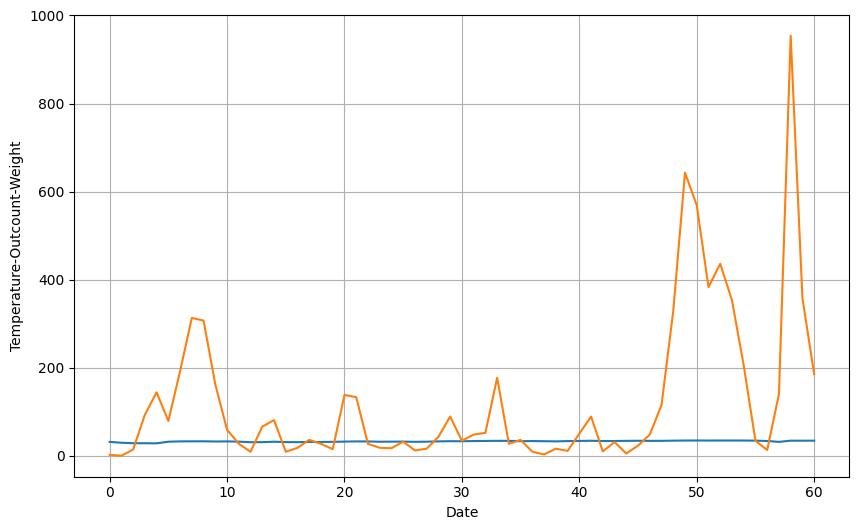

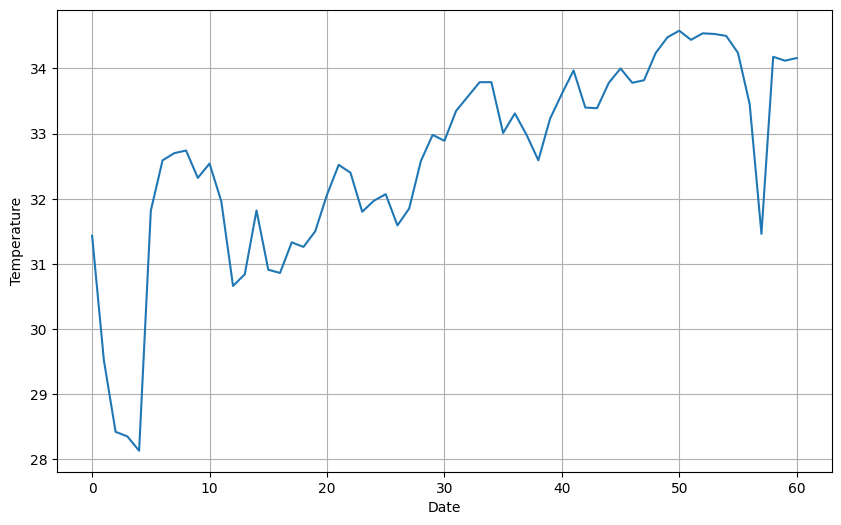

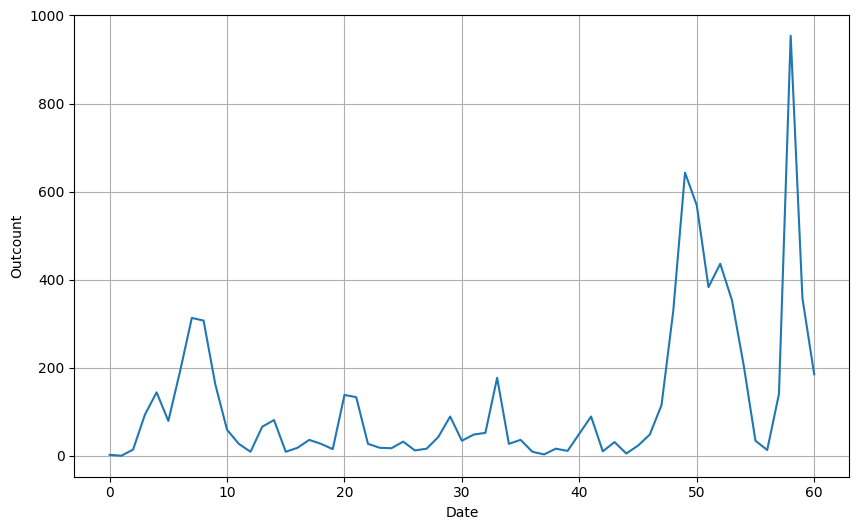

In [11]:
label_columns = ['temp', 'outcount']

# initialize list
time_steps = []
labels = []

for i, row in df_spring.iterrows():
    time_steps.append(int(i))
    labels.append([float(row[-2]), int(row[-1])])

time = np.array(time_steps)
series = np.array(labels)

plot_series(time, series, xlabel='Date', ylabel='Temperature-Outcount-Weight')  # diff distribution
plot_series(time, series[:, 0], xlabel='Date', ylabel='Temperature')
plot_series(time, series[:, 1], xlabel='Date', ylabel='Outcount')

# Dataset
* Time_series형 데이터 생성
* 현재 61 samples : train 55, valid 6
* window_size = 3, shuffle, batch 지정

In [12]:
# Define the split time
split_time = 55

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [13]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [14]:
# Parameters
window_size = 3
batch_size = 16
shuffle_buffer_size = 100

# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
train_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 2), dtype=tf.float64, name=None))>

# Model
* Conv1D
* LSTM 2 layers
* Dense 2 layers
* Dense 1 layer -> answer

In [15]:
# Build the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                           strides=1,
                           activation="relu",
                           padding='causal',
                           input_shape=[window_size, 2]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Lambda(lambda x: x * 1000)
])

 # Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 64)             448       
                                                                 
 lstm (LSTM)                 (None, 3, 64)             33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 30)                1950      
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
 lambda (Lambda)             (None, 2)                 0

## Hyperparameter Search
* lr_scheduler
* optimizer : SGD

Epoch 1/100
4/4 [==============================] - 5s 223ms/step - loss: 139.3755 - lr: 1.0000e-08
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 138.7803 - lr: 1.1220e-08
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 137.5913 - lr: 1.2589e-08
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 136.0521 - lr: 1.4125e-08
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 134.0954 - lr: 1.5849e-08
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 131.7827 - lr: 1.7783e-08
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 128.9817 - lr: 1.9953e-08
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 125.8284 - lr: 2.2387e-08
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 122.1542 - lr: 2.5119e-08
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 118.1166 - lr: 2.8184e-08
Epoch 11/100
4/4 [========

(1e-08, 0.001, 0.0, 100.0)

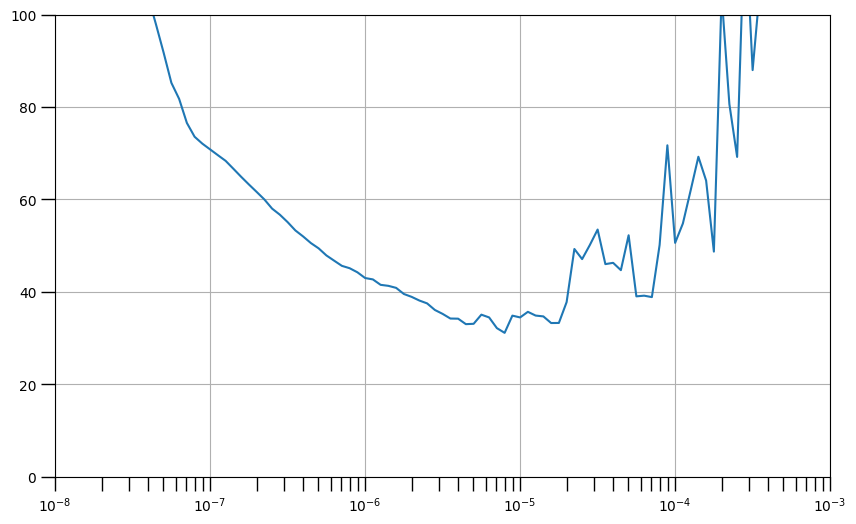

In [16]:
# Get initial weights
init_weights = model.get_weights()

# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 100])

## Callbacks
* logs.get('mae') < 3.0
* mae 3 미만으로 떨어질 때 break

In [17]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae')<3.0):
            print("\nReached 3 mae, so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

Epoch 1/1000
4/4 [==============================] - 4s 16ms/step - loss: 119.2445 - mae: 119.7445
Epoch 2/1000
4/4 [==============================] - 0s 7ms/step - loss: 81.6357 - mae: 82.1357
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 65.6672 - mae: 66.1651
Epoch 4/1000
4/4 [==============================] - 0s 8ms/step - loss: 55.4615 - mae: 55.9562
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 58.2341 - mae: 58.7341
Epoch 6/1000
4/4 [==============================] - 0s 9ms/step - loss: 51.5329 - mae: 52.0262
Epoch 7/1000
4/4 [==============================] - 0s 8ms/step - loss: 51.2155 - mae: 51.7093
Epoch 8/1000
4/4 [==============================] - 0s 9ms/step - loss: 47.6336 - mae: 48.1181
Epoch 9/1000
4/4 [==============================] - 0s 10ms/step - loss: 46.8928 - mae: 47.3925
Epoch 10/1000
4/4 [==============================] - 0s 8ms/step - loss: 45.6821 - mae: 46.1630
Epoch 11/1000
4/4 [==========================

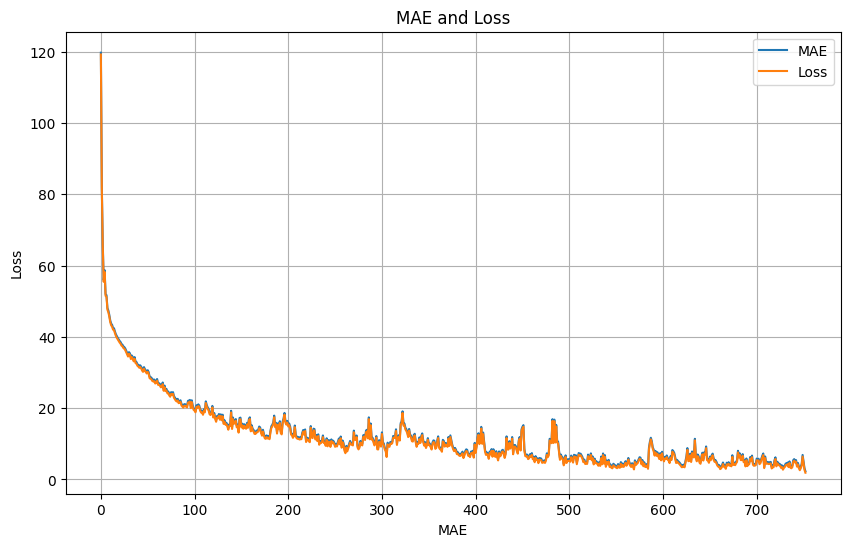

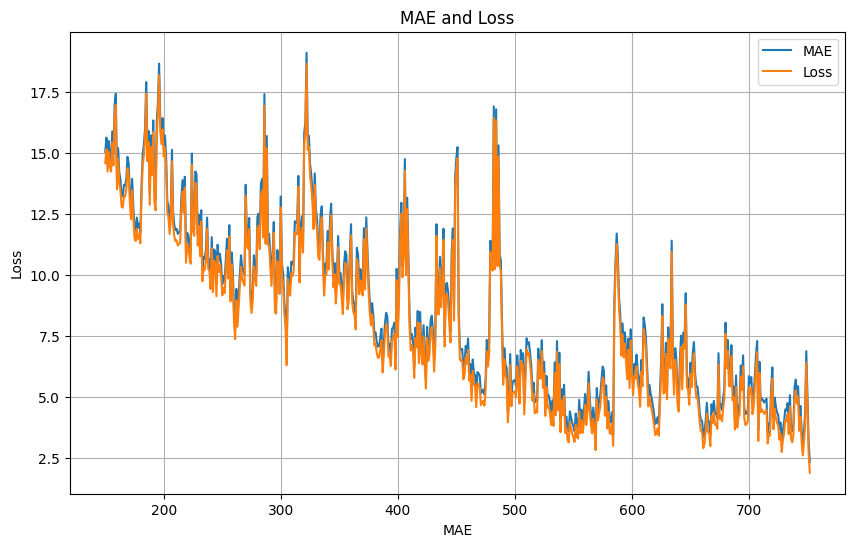

In [18]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

# Set the learning rate
learning_rate = 3e-6

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=1000, callbacks=[callbacks])

# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss))

# Plot mae and loss
plot_series(
    x=epochs,
    y=(mae, loss),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom,
    y=(mae_zoom, loss_zoom),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

In [19]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

1/1 [==============================] - 1s 1s/step


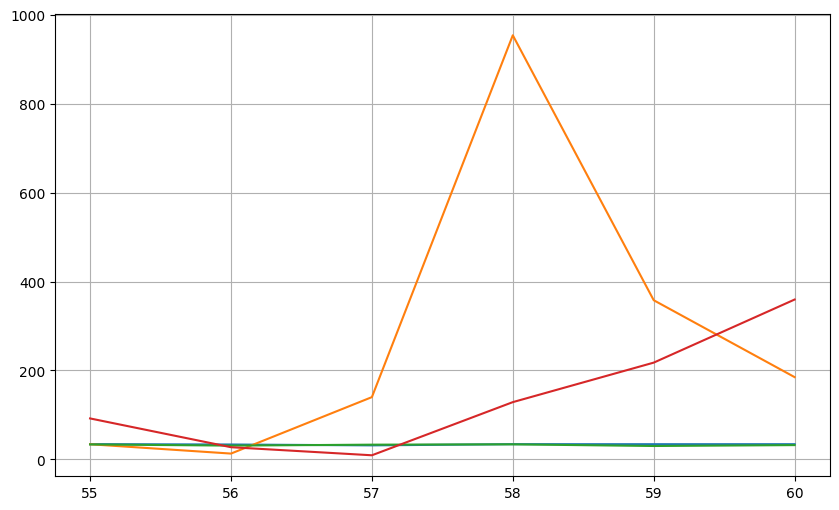

In [20]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [21]:
results

array([[ 33.5847  ,  92.07163 ],
       [ 30.949203,  27.331583],
       [ 33.05452 ,   9.18012 ],
       [ 33.784203, 128.73329 ],
       [ 30.071085, 217.60867 ],
       [ 32.07231 , 359.53223 ]], dtype=float32)

array([[ 33.73286 , 206.03233 ],
       [ 33.61407 ,  27.444899],
       [ 29.508139,  23.081198],
       [ 30.765558, 114.670906],
       [ 27.1788  , 186.3287  ],
       [ 30.210806, 240.76384 ]], dtype=float32)

In [22]:
# Compute the MAE
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

[ 29.363466   8.41619   66.2072   412.83127   72.22012   88.30996 ]
